Enter the x vector velocity(m/s): 5
Enter the y vector velocity(m/s): 3


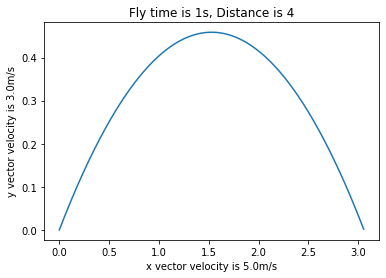

In [3]:
import math # math라이브러리
from math import pow, ceil # 제곱값을 구하는 pow, 자신보다 큰 값중 가장 근접한 정수 찾는 ceil
import matplotlib.pyplot as plt

# 중력가속도를 나타내는 GRAVITY와 그래프 표시 시간주기를 의미하는 INTERVAL을 상수로 선언
GRAVITY = 9.81
INTERVAL = 0.001

# 그래프에 포물선을 표시하기 위해 배열만드는 함수를 선언한다.
# 시작시간에 start, 끝나는 시간 end, 시간주기 steop 값을 받아 배열 생성.
def timeArrary(start, end, step):
    times = []
    while start < end:
        times.append(start)
        start += step
    return times

# 포물선을 그리는 함수 선언.
def draw_parabola(xVelocity, yVelocity):
    """
    비행시간의 계산
    F=ma(delta_v/t), t = delta_v/a(중력가속도)
    비행시간(t)은 낙하하는 시간의 두배이므로
    2(Y벡터의 속도 v_y / 중력가속도 a)
    """
    flyTime = 2 * yVelocity / GRAVITY
    """
    비행 거리는 X축의 변위
    X축의 변화되는 위치 S는
    속도 v_x와 비행시간t의 곱 (S = v_x t)
    """

    flyDistance = xVelocity * flyTime
    # 앞에 선언한 timeArray라는 함수를 이용하여 물체가 날기 시작하면서 낙하할때까지
    # 시간주기를 이용한 배열을 만든다.
    intervals = timeArrary(0, flyTime, INTERVAL)

    # 포물선에 x축과 y축의 위치를 표시하기 위한 배열을 만든다
    x = []
    y = []

    # 앞에서 만든 시간주기 배열을 For문을 이용하여 Loop를 돌리면 t 시간주기별로
    # x,y배열에 위치값을 계산하여 저장할 수 있다.
    for t in intervals:
        """
        X축의 위치 계산
        X축의 변화되는 위치 S는 (S = v_x t)
        X축 벡터 변위 : 속도 v_x와 시간t의 곱
        """
        x.append(xVelocity * t)
        """
        Y축의 위치 계산
        Y축의 변하되는 위치 S는
        Y축 벡터변위(속도 y_v와 시간 t의 곱)와
        중력 벡터변위(1/2 at^2, 4.9 t^2)의 차
        S = v_y * t - 4.9 * t^2
        """
        y.append(yVelocity*t - 0.5 * GRAVITY * math.pow(t, 2))

    # 그래프에 x, y배열에 저장한 위치값을 표시한다.
    plt.plot(x, y)
    # x축 범주에 입력한 x벡터 속도를 표시한다.
    plt.xlabel('x vector velocity is ' + str(xVelocity) + 'm/s')
    # y축 범주에 입력한 y벡터 속도를 표시한다.
    plt.ylabel('y vector velocity is ' + str(yVelocity) + 'm/s')
    # Tittle에는 계산한 비행시간과 거리를 math.ceil함수를 이용하여 정수로 표시한다.
    plt.title('Fly time is ' + str(math.ceil(flyTime)) + 's, Distance is ' + str(math.ceil(flyDistance)))


if __name__ == '__main__':
    try:
        xVelocity = float(input('Enter the x vector velocity(m/s): ')) # x벡터 속도
        yVelocity = float(input('Enter the y vector velocity(m/s): ')) # y벡터 속도
    except ValueError:
        print('Invalid input') # 잘못된 값을 입력 받을 시 에러메시지 출력
    else:
        draw_parabola(xVelocity, yVelocity)
        plt.show()